In [4]:
from addit.dit import rundit, runditfold, runditf1, make_dLarray
import jax.numpy as jnp
import numpy as np
from addit.ncf import inc3D

In [2]:
N=1
Ng_nu=2000
Ng_beta=15
Ng_gammaL=15

nus=np.linspace(1900.0,2300.0,Ng_nu) #nu grid
beta_grid=np.logspace(-2,1,Ng_beta) #beta grid
gammaL_grid=np.logspace(-4,1,Ng_gammaL)#gammaL grid
S=np.logspace(0.0,2.0,N)
S[0:10]=1000.0

nu_lines=np.linspace(1950.0,2250.0,N)
beta=np.random.rand(N)*0.1
gammaL=np.random.rand(N)*0.01

In [5]:
F0=rundit(S,nu_lines,beta,gammaL,nus,beta_grid,gammaL_grid)
print(len(F0[F0<0]))
F0f=runditf1(S,nu_lines,beta,gammaL,nus,beta_grid,gammaL_grid)
print(len(F0f[F0f<0]))
dnu=nus[1]-nus[0]
dLarray=make_dLarray(2,dnu)
F0f2=runditfold(S,nu_lines,beta,gammaL,nus,beta_grid,gammaL_grid,2,dLarray)
print(len(F0f2[F0f2<0]))
from exojax.spec import xsection
xsv=xsection(nus,nu_lines,beta,gammaL,S)

998
11
11


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  3.85it/s]


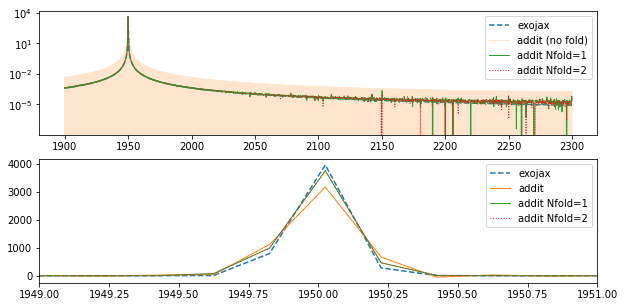

In [9]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
fig.add_subplot(211)
plt.plot(nus,xsv,label="exojax",ls="dashed")
plt.plot(nus,F0,label="addit (no fold)",lw=1,alpha=0.2)
plt.plot(nus,F0f,label="addit Nfold=1",lw=1,alpha=1)
plt.plot(nus,F0f2,label="addit Nfold=2",lw=1,alpha=1,ls="dotted")
#plt.xlim(2125,2175)
plt.yscale("log")
plt.legend()
fig.add_subplot(212)
plt.plot(nus,xsv,label="exojax",ls="dashed")
plt.plot(nus,F0,label="addit",lw=1)
plt.plot(nus,F0f,label="addit Nfold=1",lw=1)
plt.plot(nus,F0f2,label="addit Nfold=2",lw=1,ls="dotted")
plt.xlim(1949,1951)
#plt.yscale("log")
plt.legend()
plt.savefig("foldtest.png")

In [10]:
N=1
Ng_nu=5000
Ng_beta=15
Ng_gammaL=15

nus=np.linspace(1900.0,2300.0,Ng_nu) #nu grid
beta_grid=np.logspace(-2,1,Ng_beta) #beta grid
gammaL_grid=np.logspace(-4,1,Ng_gammaL)#gammaL grid
S=np.logspace(0.0,2.0,N)
S[0:10]=1000.0

nu_lines=np.linspace(1950.0,2250.0,N)
beta=np.random.rand(N)*0.1
gammaL=np.random.rand(N)*0.01

In [18]:
F0=rundit(S,nu_lines,beta,gammaL,nus,beta_grid,gammaL_grid)
print(len(F0[F0<0]))
F0f=runditf1(S,nu_lines,beta,gammaL,nus,beta_grid,gammaL_grid)
print(len(F0f[F0f<0]))
dnu=nus[1]-nus[0]
dLarray=make_dLarray(2,dnu)
F0f2=runditfold(S,nu_lines,beta,gammaL,nus,beta_grid,gammaL_grid,2,dLarray)
print(len(F0f2[F0f2<0]))

101
33
33


In [19]:
jnp.min(F0f2)

DeviceArray(-0.00037241, dtype=float32)

In [20]:
import matplotlib.pyplot as plt

In [21]:
from exojax.spec import xsection
xsv=xsection(nus,nu_lines,beta,gammaL,S)

100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 1590.56it/s]


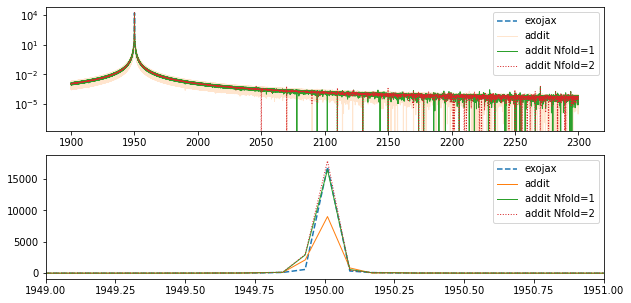

In [22]:
fig=plt.figure(figsize=(10,5))
fig.add_subplot(211)
#plt.title("range =2150"+"+-"+str(ll))
plt.plot(nus,xsv,label="exojax",ls="dashed")
plt.plot(nus,F0,label="addit",lw=1,alpha=0.2)
plt.plot(nus,F0f,label="addit Nfold=1",lw=1,alpha=1)
plt.plot(nus,F0f2,label="addit Nfold=2",lw=1,alpha=1,ls="dotted")
#plt.xlim(2125,2175)
plt.yscale("log")
plt.legend()
fig.add_subplot(212)
plt.plot(nus,xsv,label="exojax",ls="dashed")
plt.plot(nus,F0,label="addit",lw=1)
plt.plot(nus,F0f,label="addit Nfold=1",lw=1)
plt.plot(nus,F0f2,label="addit Nfold=2",lw=1,ls="dotted")
plt.xlim(1949,1951)
#plt.yscale("log")
plt.legend()
plt.savefig("foldtest.png")